In [ ]:
llpars = list()
get_ll = function(theta, x_i, G){
    # betas, then alpha, mu, sigma^2
    num_loci = ncol(G)
    num_indivs = nrow(G)
    betas = theta[1:num_loci]
    alpha = theta[num_loci+1]
    mu = theta[num_loci+2]
    sigma2 = theta[num_loci+3]
    b = as.numeric(G %*% betas)
    mu_i = sign(b)*abs(b)^alpha + mu
    ll = -num_indivs*0.5*log(2*pi*sigma2) - 0.5/sigma2*sum((x_i-mu_i)^2)
    #print(paste(ll, alpha))
    return(ll)
}

In [216]:
num_loci = 500
num_indivs = 50000

G = matrix(sample(c(0,1,2), size = num_loci*num_indivs, replace = TRUE), num_indivs, num_loci)

betas = runif(num_loci, -1, 1)
alpha = 1.0
b = G %*% betas
sigma2 = 4^2

mu = 160

mu_i = sign(b) * abs(b)^alpha + mu

x_i = numeric(length(mu_i))
for(i in 1:length(mu_i)){
    x_i[i] = rnorm(1, mu_i[i], sqrt(sigma2))
}

rbetas = runif(num_loci, -1,1)
pars = c(rbetas, alpha, mu, sigma2)

In [217]:
dim(G)

[1] 50000   500

In [218]:
get_ll(pars, x_i, G)

[1] -514184.6

In [219]:
get_gradient = function(theta, x_i, G){
    func_time = Sys.time()
    grad = rep(0,length(theta))
    # calculate gradient for betas first
    num_loci = ncol(G)
    num_indivs = nrow(G)
    betas = theta[1:num_loci]
    alpha = theta[num_loci+1]
    mu = theta[num_loci+2]
    sigma2 = theta[num_loci+3]
    
    start = Sys.time()
    b = as.numeric(G %*% betas)
    mult_time = Sys.time()-start
    absb = abs(b)
    signb = sign(b)
    mu_i = signb*absb^alpha + mu
    
    
    # first calculate second term
    term2 = absb^(alpha-1)
    
    x_i_minus_mu_i = x_i-mu_i
    
    # then first term
    term1 = x_i_minus_mu_i*alpha/sigma2
    
    term3 = term1*term2
    
    start = Sys.time()
    betagrads = as.numeric(term3 %*% G)
    mult_time = mult_time + Sys.time()-start
    #print(paste("multiplication time", mult_time))
    grad[1:num_loci] = betagrads
    
    # gradient for alpha
    d_dalpha_ll = 1.0/(2*sigma2)*sum(2*x_i_minus_mu_i*signb*absb^alpha * log(absb))
    grad[num_loci+1] = d_dalpha_ll
    
    # gradient for mu
    grad[num_loci+2] = sum(x_i_minus_mu_i)/sigma2
    
    # gradient for sigma2
    grad[num_loci+3] = (sum(x_i_minus_mu_i^2)/2.0) / sigma2^2 - num_indivs/(2*sigma2)
    
    func_time = Sys.time()-func_time
    #print(paste("function time", func_time))
    print(paste("alpha deriv:", alpha, grad[num_loci+1]))
    return(grad)
}

get_d_dalpha_mu_i = function(b, alpha){
    absb = abs(b)
    return(sign(b)*absb^alpha*log(absb))
}

In [222]:
library(numDeriv)

In [223]:
x = get_gradient(pars, x_i, G)

[1] "alpha deriv: 1 -647158.761048218"


In [226]:
xn = grad(get_ll, pars, method = "Richardson", method.args = NULL, side = NULL, x_i, G)

In [227]:
cbind(x, xn)

x,xn
-14750.897,-14750.897
-13723.823,-13723.823
-13073.420,-13073.420
-12816.584,-12816.584
-12085.233,-12085.233
-14390.075,-14390.075
-10828.412,-10828.412
-14586.432,-14586.432
-15999.903,-15999.903
-9895.706,-9895.706


In [229]:
min(x/xn)
max(x/xn)

[1] 0.9999986

[1] 1

In [181]:
target_ll = function(pars){return(-1.0*get_ll(pars, x_i, G))}
target_grad = function(pars){return(-1.0*get_gradient(pars, x_i, G))}

In [204]:
parscale = rep(1, length(pars))
parscale[length(pars)] = 0.001
res = optim(pars, target_ll, target_grad, method = "L-BFGS-B", control = list(REPORT=1, parscale = parscale))

[1] "-1503710.88810388 1"
[1] "alpha deriv: 1 -1915531.42645063"
[1] "-927568.272491593 0.269526181133369"
[1] "alpha deriv: 0.269526181133369 227192.305077621"
[1] "-897941.979248155 0.34486114400186"
[1] "alpha deriv: 0.34486114400186 300414.706102525"
[1] "-688946.046871821 0.646200995475825"
[1] "alpha deriv: 0.646200995475825 744548.943711859"
[1] "-1323972629.78675 1.85156040137168"
[1] "alpha deriv: 1.85156040137168 -10291415605.3143"
[1] "-492529.748943248 1.00383998726078"
[1] "alpha deriv: 1.00383998726078 -1918815.9083129"
[1] "-563895.03702228 0.763039760043164"
[1] "alpha deriv: 0.763039760043164 839396.552132702"
[1] "-429793.441785685 0.924763177570972"
[1] "alpha deriv: 0.924763177570972 -52695.0098576894"
[1] "-26561259.5577228 1.38917097449673"
[1] "alpha deriv: 1.38917097449673 -223800621.661018"
[1] "-572297.655895374 1.0277131428317"
[1] "alpha deriv: 1.0277131428317 -3298271.89603754"
[1] "-428469.451777219 0.934827459681608"
[1] "alpha deriv: 0.934827459681608 -2

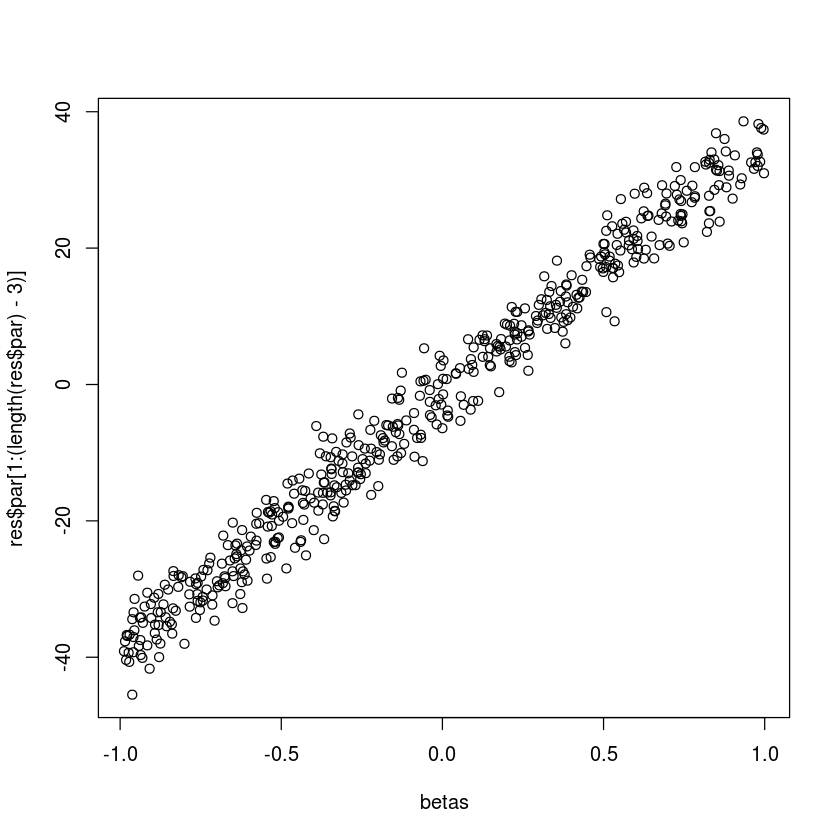

In [205]:
plot(betas, res$par[1:(length(res$par)-3)])

In [172]:
bad_params = llpars

In [173]:
bad_params

[1]    44.10336    35.41992    32.51038    47.26456    30.04793    27.48557
  [7]    40.09327    42.28642    40.07072    49.29564    27.40774    40.69674
 [13]    49.24953    33.43552    41.29829    35.57414    58.29662    46.59373
 [19]    32.72749    42.32471    45.44247    51.22442    37.55476    54.35812
 [25]    43.95622    44.38004    41.97193    25.58952    47.23442    37.55019
 [31]    14.94860    44.78189    28.67565    36.24638    32.30908    22.54693
 [37]    39.90701    40.90927    35.80029    50.46769    34.34095    38.53222
 [43]    37.38426    50.86990    28.51074    40.72669    32.63578    39.03409
 [49]    27.31853    40.61165    38.93118    24.54828    31.57302    51.57633
 [55]    37.58760    43.37871    39.15657    38.49401    38.23153    29.60470
 [61]    45.38583    40.56269    30.82126    32.94837    33.92679    32.90150
 [67]    40.92969    44.85128    31.65016    48.13077    39.73802    41.00938
 [73]    25.44109    30.18546    36.59538    52.73503    42.78464    43.31856
 [79]    34.88916    34.51565    30.83575    47.74876    56.69067    46.28174
 [85]    47.43504    34.77206    58.63031    35.85653    45.53479    24.12202
 [91]    40.31400    49.31565    25.99202    50.72840    53.99859    49.05601
 [97]    25.33604    29.68392    24.68427    50.10282    22.17535    48.80737
[103]    54.67153    41.75314    28.05791    38.50121    42.81523    63.25269
[109]    41.65180    28.03574    40.23742    45.35864    35.88025    32.86562
[115]    32.88269    22.84690    54.89587    32.75955    35.52441    52.35881
[121]    55.46588    27.54621    38.45770    54.36663    46.96838    44.10834
[127]    34.95302    32.72320    47.88975    29.62315    38.00667    44.62197
[133]    47.12846    38.24157    35.01598    53.08569    42.70888    61.63603
[139]    49.88528    50.53931    41.48113    45.10243    40.71188    34.52911
[145]    40.06542    37.88720    31.79004    43.20396    36.08624    44.74364
[151]    40.89809    37.42261    52.86725    50.73497    45.66404    33.19480
[157]    26.97520    45.93503    21.89768    56.97215    31.85786    38.29474
[163]    32.02357    29.19457    34.48697    32.59462    33.37120    48.37766
[169]    36.76668    46.83445    49.01643    30.62478    32.62628    44.08929
[175]    64.47389    36.48276    43.22424    54.56624    44.26899    35.21397
[181]    46.88397    50.34513    36.70162    42.81644    37.00579    52.49872
[187]    38.82373    40.45617    30.38775    30.43142    56.83514    39.75692
[193]    37.97895    30.16102    28.23849    34.38190    46.40650    42.24071
[199]    42.57931    35.05869    52.90345    20.59012    34.41283    54.17967
[205]    57.60242    30.19282    28.05358    26.81004    44.70661    46.07546
[211]    54.72841    26.91356    39.60532    37.56763    37.61724    49.87365
[217]    36.85447    41.78971    45.01563    42.55907    43.96697    65.21378
[223]    56.73086    51.00900    51.90136    49.51706    45.07560    31.87126
[229]    56.49091    50.80299    42.00219    49.29115    30.03822    45.76188
[235]    55.31235    30.82624    36.11031    47.59635    34.19801    31.68182
[241]    45.68622    46.81289    44.43704    40.92548    57.60184    29.61555
[247]    37.30230    25.61562    27.55110    34.81224    25.91154    36.08976
[253]    45.47683    46.16145    41.25495    36.02671    39.02160    55.66440
[259]    48.26884    44.86477    48.07794    28.32059    41.29909    48.29675
[265]    45.34767    32.51135    42.66944    39.95813    50.43115    45.52783
[271]    15.99314    50.79334    42.21270    32.00248    25.03392    29.01214
[277]    30.57500    26.53237    24.11169    47.51123    50.66483    28.44823
[283]    41.99051    47.09517    40.12615    35.58348    29.84460    66.26236
[289]    35.54815    26.98120    45.12301    23.67005    48.45337    35.33297
[295]    35.29498    38.04557    44.26280    59.72531    38.32536    42.14757
[301]    35.26621    34.34543    48.15110    34.95586    41.23849    47.58984
[307]    32.16946    30.

In [104]:
(xn/x)

[1] 1.0000067 0.9999959 1.0000023 0.9999947 1.0000055 0.9999991 1.0000003
  [8] 0.9999950 1.0000033 0.9999988 1.0000027 0.9999996 1.0000028 1.0000037
 [15] 0.9999986 1.0000072 1.0000002 1.0000006 0.9999930 0.9999975 0.9999966
 [22] 0.9999994 1.0000006 1.0000009 0.9999955 0.9999964 1.0000044 1.0000031
 [29] 1.0000017 0.9999933 0.9999970 1.0000053 1.0000002 1.0000068 1.0000096
 [36] 0.9999942 0.9999990 0.9999953 0.9999950 0.9999918 1.0000002 1.0000045
 [43] 1.0000024 0.9999960 0.9999949 0.9999911 1.0000010 1.0000000 0.9999969
 [50] 0.9999995 1.0000000 0.9999995 0.9999923 0.9999994 1.0000040 1.0000046
 [57] 0.9999974 1.0000012 0.9999978 1.0000018 0.9999942 1.0000036 0.9999966
 [64] 0.9999933 0.9999963 0.9999969 1.0000008 1.0000031 0.9999991 0.9999962
 [71] 0.9999986 1.0000048 1.0000001 1.0000079 0.9999985 1.0000066 1.0000024
 [78] 0.9999981 0.9999939 0.9999944 1.0000013 0.9999948 0.9999970 0.9999969
 [85] 1.0000028 1.0000092 1.0000007 0.9999976 0.9999918 0.9999990 0.9999958
 [92] 1.0000040 0.9999927 0.9999925 1.0000036 0.9999921 1.0000051 0.9999983
 [99] 0.9999976 0.9999986 0.9999972 0.9999980 0.9999953 0.9999971 1.0000034
[106] 0.9999974 1.0000020 0.9999987 0.9999929 0.9999926 1.0000069 0.9999959
[113] 1.0000071 0.9999995 1.0000042 0.9999957 0.9999965 0.9999968 0.9999962
[120] 0.9999924 1.0000008 0.9999972 0.9999928 0.9999964 0.9999954 1.0000041
[127] 0.9999937 0.9999968 1.0000015 1.0000047 0.9999988 1.0000003 1.0000029
[134] 1.0000088 0.9999951 0.9999978 1.0000009 0.9999976 0.9999997 1.0000011
[141] 0.9999985 0.9999953 0.9999962 1.0000013 1.0000071 0.9999968 1.0000009
[148] 1.0000044 1.0000015 0.9999938 1.0000033 0.9999996 1.0000037 0.9999998
[155] 0.9999977 1.0000014 0.9999997 0.9999989 1.0000022 1.0000008 0.9999995
[162] 0.9999958 1.0000041 1.0000037 0.9999963 0.9999949 0.9999953 0.9999961
[169] 0.9999991 1.0000012 0.9999996 1.0000003 1.0000058 1.0000121 1.0000036
[176] 1.0000030 0.9999946 0.9999968 1.0000058 1.0000049 1.0000132 1.0000079
[183] 0.9999953 1.0000044 0.9999959 0.9999983 1.0000033 0.9999981 0.9999976
[190] 0.9999976 1.0000030 0.9999965 1.0000010 1.0000021 0.9999990 1.0000074
[197] 1.0000022 1.0000019 1.0000040 1.0000010 1.0000050 1.0000048 1.0000042
[204] 1.0000029 0.9999965 0.9999998 1.0000018 1.0000014 1.0000010 0.9999979
[211] 1.0000058 1.0000106 1.0000009 0.9999986 1.0000019 0.9999992 0.9999970
[218] 1.0000033 0.9999961 0.9999978 0.9999973 1.0000003 1.0000079 1.0000015
[225] 1.0000006 1.0000034 0.9999983 1.0000073 0.9999964 1.0000068 0.9999982
[232] 0.9999955 1.0000019 0.9999955 0.9999990 0.9999982 1.0000020 0.9999989
[239] 0.9999984 0.9999931 0.9999987 1.0000106 0.9999991 1.0000056 0.9999960
[246] 1.0000011 0.9999996 0.9999967 0.9999985 1.0000016 0.9999996 1.0000012
[253] 1.0000055 0.9999974 0.9999993 0.9999994 0.9999980 1.0000009 0.9999992
[260] 0.9999986 1.0000053 1.0000054 1.0000058 0.9999934 0.9999998 0.9999953
[267] 1.0000031 0.9999954 1.0000022 1.0000061 0.9999958 1.0000008 0.9999998
[274] 0.9999979 0.9999994 1.0000027 1.0000019 0.9999985 1.0000043 1.0000053
[281] 1.0000036 0.9999980 0.9999985 1.0000014 0.9999990 1.0000067 1.0000007
[288] 1.0000088 1.0000080 0.9999971 1.0000006 1.0000010 1.0000003 1.0000013
[295] 1.0000009 0.9999969 0.9999952 1.0000001 1.0000026 0.9999948 0.9999985
[302] 0.9999986 1.0000039 1.0000027 1.0000006 1.0000005 1.0000069 1.0000114
[309] 1.0000106 0.9999999 0.9999955 0.9999964 1.0000068 1.0000027 0.9999876
[316] 0.9999925 0.9999947 1.0000032 0.9999957 0.9999986 1.0000012 1.0000020
[323] 1.0000002 0.9999957 0.9999982 0.9999936 1.0000058 1.0000096 0.9999941
[330] 0.9999959 0.9999902 1.0000108 1.0000089 1.0000148 0.9999940 0.9999990
[337] 0.9999953 0.9999989 0.9999925 1.0000013 0.9999979 1.0000007 1.0000071
[344] 0.9999999 0.9999977 0.9999935 1.0000000 0.9999952 0.9999984 1.0000113
[351] 1.0000085 1.0000013 0.9999978 1.0000019 0.9999961 0.9999980 1.0000015
[358] 1.0000019 0.9999968 1.0000053 1.0000010 1.0000020 0.9999980 1.0000004
[365] 0.9999999 1.0000056 1.0000016 1.0000008 1.00